In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

    

In [31]:
# Dataset simulado
productos_nombres = ['Producto A', 'Producto B', 'Producto C', 'Producto D', 'Producto E', 'Producto F', 'Producto G', 'Producto H', 'Producto I']
departamentos = ['Ventas', 'Logística', 'Finanzas', 'Marketing', 'IT']
precios = np.random.uniform(100, 350, size=9).round(2)
departamentos_asignados = np.random.choice(departamentos, size=9)

empresa_data = {
    'productos': [
        {
            'id': i+1,
            'nombre': productos_nombres[i],
            'departamento': departamentos_asignados[i],
            'precio': precios[i],
            'iva': 0.21
        }
        for i in range(9)
    ],
    'departamentos': departamentos,
    'iva': 0.21
}


In [32]:
df_productos = pd.DataFrame(empresa_data['productos'])
df_productos

,id,nombre,departamento,precio,iva
0,1,Producto A,Marketing,213.94,0.21
1,2,Producto B,Finanzas,172.43,0.21
2,3,Producto C,Logística,296.04,0.21
3,4,Producto D,Finanzas,200.47,0.21
4,5,Producto E,Ventas,155.03,0.21
5,6,Producto F,Finanzas,295.64,0.21
6,7,Producto G,Ventas,165.46,0.21
7,8,Producto H,Ventas,303.04,0.21
8,9,Producto I,Marketing,340.31,0.21


In [33]:
# Resumen Estadístico de los Datos

# Calcular el resumen estadístico del DataFrame df_productos, excluyendo la columna 'id'
descripcion_estadistica = df_productos.drop(columns=['id']).describe(include='all')

# Mostrar el resumen estadístico
descripcion_estadistica

,nombre,departamento,precio,iva
count,9,9,9.000000,9.00
unique,9,4,NaN,NaN
top,Producto A,Finanzas,NaN,NaN
freq,1,3,NaN,NaN
mean,NaN,NaN,238.040000,0.21
std,NaN,NaN,70.552654,0.00
min,NaN,NaN,155.030000,0.21
25%,NaN,NaN,172.430000,0.21
50%,NaN,NaN,213.940000,0.21
75%,NaN,NaN,296.040000,0.21


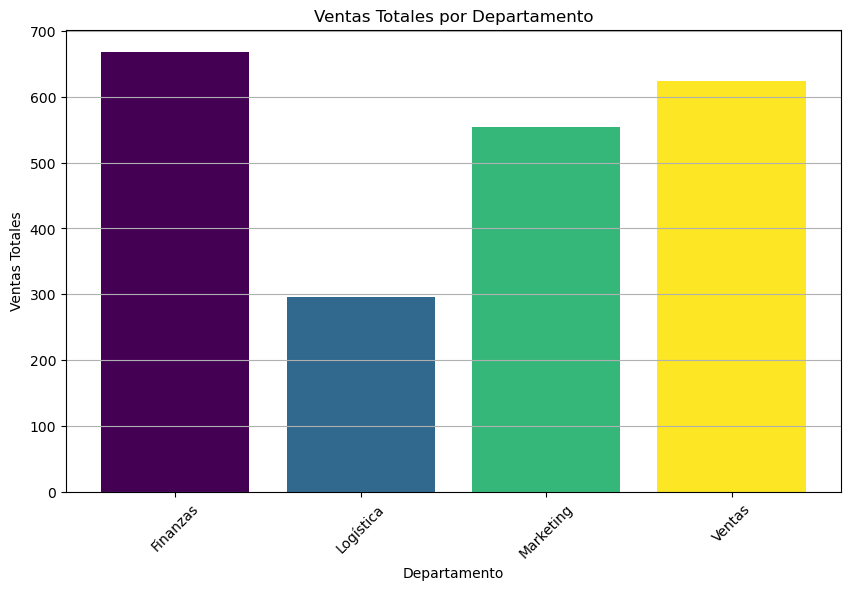

In [34]:
# Gráfico de Barras de Ventas Totales por Departamento

# Agrupar los datos por departamento y sumar los precios
ventas_por_departamento = df_productos.groupby('departamento')['precio'].sum().reset_index()


colors = plt.cm.viridis(np.linspace(0, 1, len(ventas_por_departamento)))
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_departamento['departamento'], ventas_por_departamento['precio'], color=colors)
plt.title('Ventas Totales por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [37]:
ventas_por_departamento = df_productos.groupby('departamento')['precio'].sum().reset_index()

In [38]:
ventas_por_departamento

,departamento,precio
0,Finanzas,668.54
1,Logística,296.04
2,Marketing,554.25
3,Ventas,623.53


In [39]:
type(ventas_por_departamento)

pandas.core.frame.DataFrame

In [40]:
def calcular_total_ventas(empresa_data):
    """
    Calcula el total de ventas sumando los precios de todos los productos en el diccionario empresa_data.
    
    Parámetros:
    empresa_data (dict): Diccionario que contiene la clave 'productos' con una lista de diccionarios, cada uno con 'precio'.
    
    Retorna:
    float: El total de ventas.
    """
    total = sum(producto['precio'] for producto in empresa_data['productos'])
    return total

In [41]:
total_ventas = calcular_total_ventas(empresa_data)
print(f"El total de ventas es: {total_ventas}")

El total de ventas es: 2142.36
